### Approaches

TBC - all methods for additive time series only?

- Simple Exponential Smoothing (SES) - constant level and no seasonality
- Holt Exponential Smoothing - trend but no seasonality
- Holt-Winters Exponential Smoothing - may have trend and seasonality
- Winters Exponential Smoothing - no trend, just seasonality

In [1]:
from statsmodels.tsa.api import SimpleExpSmoothing
import statsmodels as sm
import pandas as pd
import numpy as np

### Simple Exponential Smoothing

In [2]:
df = sm.datasets.get_rdataset(package='datasets', dataname='airquality').data

df['Year'] = 1973 # as per the dataset description - range is: May 1, 1973 (a Tuesday) to September 30, 1973.
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

df.drop(columns=['Year', 'Month', 'Day'], inplace=True)
df = df.set_index('Date', drop=True).asfreq('D')
df.head(2)

,Ozone,Solar.R,Wind,Temp
Date,,,,
1973-05-01,41.0,190.0,7.4,67
1973-05-02,36.0,118.0,8.0,72


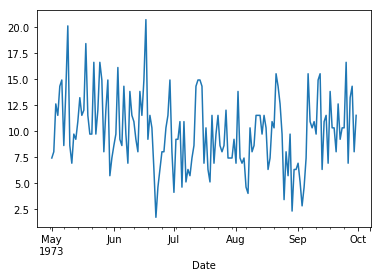

In [3]:
%matplotlib inline

_ = df['Wind'].plot()

In [4]:
fit = SimpleExpSmoothing(df['Wind']).fit() # optimised smoothing, removes need of smoothing_level param
print('SSE: ' + str(fit.sse))
fit.params

SSE: 1823.854956967304


{'smoothing_level': 0.07897554243751963,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 11.359314653532008,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

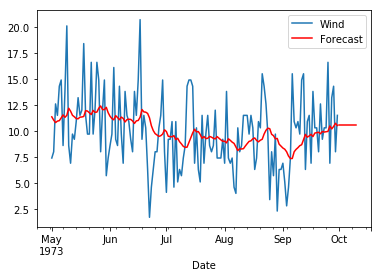

In [5]:
fcast = fit.forecast(10).rename('Forecast')

ax = df['Wind'].plot(legend=True)
_ = fit.fittedvalues.plot(ax=ax, color='red')   # predicted past
_ = fcast.plot(ax=ax, color='red', legend=True) # predicted future

### Other examples

For more detailed examples, see: https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html